## Observations and Insights 


- Capomulin outperforms all other treatment options in the screen.
- Only Capomulin treatment that reduce tumor volume by 19% over the course of the experiment, whereas all other drugs had an increase in tumor volume by roughly 40-50%.
- mice on the Capomulin treatment had the highest survival rate of any treatment in the screen. Over 90% of mice treated by Capomulin survived the full duration of the trial, compared to only 35-45% of mice on other treatment options.
- the average mouse on Capomulin had only 1 new metastatic site, as opposed to the average 2-3 found in mice of other treatment options at the end of the experiment   

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

Merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "left")

# Display the data table for preview

Merged_data_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
Merged_data_df["Mouse ID"].nunique ()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Merged_data_df[Merged_data_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

Merged_data_df[Merged_data_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_df = Merged_data_df[Merged_data_df['Mouse ID'] != 'g989']
clean_merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.

clean_merged_df["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM" : sem})
summary_statistics_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
grp = clean_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements Taken')

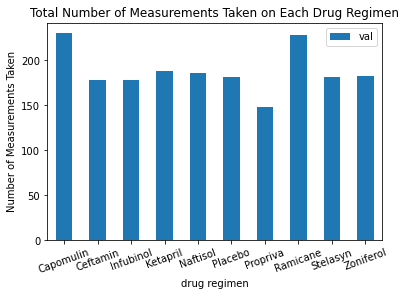

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_chart_df = clean_merged_df.groupby("Drug Regimen").count()
bar_chart_df

df = pd.DataFrame({'drug regimen':['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'], 
                   'val':[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]})
ax = df.plot.bar(x='drug regimen', y='val', rot=20)
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.ylabel('Number of Measurements Taken')

Text(0, 0.5, 'total number of measurements taken')

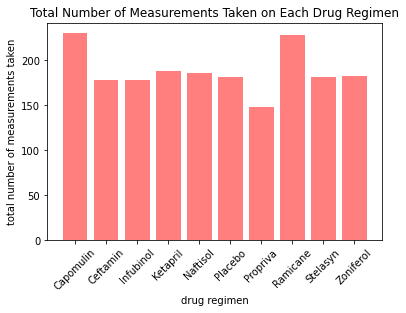

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drug_count = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.bar(x_axis, drug_count, color = 'r', alpha = 0.5, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)

#plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("drug regimen")
plt.ylabel("total number of measurements taken")

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Determine distribution of male to female mice

#Calc total mice, male & female with cleaned data

gender_df = clean_merged_df["Mouse ID"].nunique()
gender_df

#Calculate unique males

gender2_sort = clean_merged_df.loc[clean_merged_df["Sex"] == "Male"]   
gender2_sort["Mouse ID"].nunique()

#Calculate unique females

gender3_sort = clean_merged_df.loc[clean_merged_df["Sex"] == "Female"]   
gender3_sort["Mouse ID"].nunique()

#*Total* male to female mice ~ table created for curiosity ~

clean_merged_df.groupby("Sex").count()

df = pd.DataFrame({'sex count': [123, 125]}, 
                   index=['Female', 'Male'])



([<matplotlib.patches.Wedge at 0x277621cdc70>,
 [Text(0.013934097579311265, 1.0999117423341975, ''),
  Text(-0.0139340975793114, -1.0999117423341975, '')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

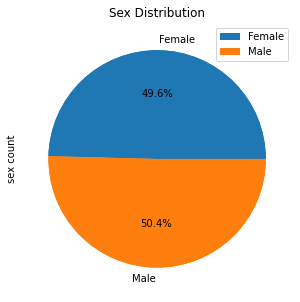

In [14]:
plot = df.plot.pie(y='sex count', figsize=(5, 5))
labels = ["Female", "Male"]
sizes = [123, 125]
explode = (0.1, 0)


plt.title("Sex Distribution")
sex_count = [123, 125]
plt.pie(sex_count, autopct='%1.1f%%')

(-1.1683887349901103,
 1.1059919676901988,
 -1.2281510831493558,
 1.110225106507873)

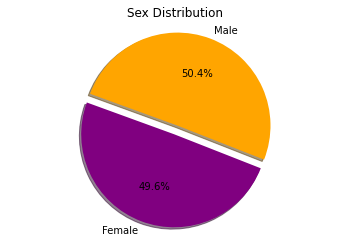

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [123, 125]
colors = ["purple", "orange"]
explode = (0.1, 0)

plt.pie(sizes, labels = labels, colors = colors, explode=explode, autopct = "%1.1f%%", shadow=True, startangle=160)

plt.title("Sex Distribution")

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [16]:
clean_merged_df['Mouse ID'].nunique()

248

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Get defined data for the problem: 
qob_df = clean_merged_df[clean_merged_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
qob_df = qob_df.sort_values(["Timepoint"], ascending=False)
qob_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [18]:
#Get only needed data/narrow down drug regimen; narrow down columns 

qob2_data_df = qob_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
qob2_data_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
75,Ramicane,z578,0,45.000000
1113,Ceftamin,l490,0,45.000000
1120,Ceftamin,l558,0,45.000000
1123,Ceftamin,l661,0,45.000000


In [19]:
#Calc the latest timepoint per mouse (the tumor volume at the last timepoint)
#Sort by Infubinol

Infubinol_sort = qob2_data_df.loc[qob2_data_df["Drug Regimen"] == "Infubinol"]   

Infubinol2_sort = Infubinol_sort.sort_values("Timepoint", ascending = False)
Infubinol2_sort = Infubinol_sort.drop_duplicates(subset="Mouse ID", keep='first')
Infubinol2_sort

tumors_Infubinol = Infubinol2_sort['Tumor Volume (mm3)']
tumors_Infubinol

1872    62.754451
800     62.435404
463     67.973419
473     65.525743
637     72.226731
834     60.918767
1053    66.196912
540     66.083066
1813    67.685569
949     67.289621
1076    62.117279
1312    55.629428
1397    54.656549
1225    60.165180
530     57.031862
1726    58.268442
742     60.969711
1485    55.650681
1683    50.005138
1632    54.048608
1640    51.542431
669     36.321346
1314    45.699331
1616    46.250112
1205    47.010364
Name: Tumor Volume (mm3), dtype: float64

In [20]:
#Sort by Capomulin

Capomulin_sort = qob2_data_df.loc[qob2_data_df["Drug Regimen"] == "Capomulin"]   

Capomulin2_sort = Capomulin_sort.sort_values("Timepoint", ascending = False)
Capomulin2_sort = Capomulin_sort.drop_duplicates(subset="Mouse ID", keep='first')
Capomulin2_sort


tumors_Capomulin = Capomulin2_sort['Tumor Volume (mm3)']
tumors_Capomulin

440     47.685963
144     33.329098
134     32.377357
124     31.896238
104     31.023923
164     34.455298
244     37.074024
282     38.846876
299     38.939633
224     36.041047
309     38.982878
337     38.125164
204     37.311846
350     40.658124
360     40.159220
370     40.728578
380     41.483008
390     41.581521
29      28.484033
39      28.430964
19      23.343598
317     38.753265
64      30.485985
1455    46.539206
340     39.952347
Name: Tumor Volume (mm3), dtype: float64

In [21]:
#Sort by Ramicane

Ramicane_sort = qob2_data_df.loc[qob2_data_df["Drug Regimen"] == "Ramicane"]   

Ramicane2_sort = Ramicane_sort.sort_values("Timepoint", ascending = False)
Ramicane2_sort = Ramicane_sort.drop_duplicates(subset="Mouse ID", keep='first')
Ramicane2_sort

tumors_Ramicane = Ramicane2_sort['Tumor Volume (mm3)']
tumors_Ramicane

154    33.397653
114    31.095335
94     31.560470
84     30.638696
74     30.564625
430    43.047543
420    45.220869
410    40.667713
254    36.374510
272    37.311236
234    37.225650
214    38.810366
327    38.407618
194    36.134852
184    33.562402
174    32.978522
400    40.659006
59     30.276232
9      22.050126
49     29.128472
262    36.561652
289    38.342008
447    43.419381
453    44.183451
449    43.166373
Name: Tumor Volume (mm3), dtype: float64

In [22]:
#Sort by Ceftamin

Ceftamin_sort = qob2_data_df.loc[qob2_data_df["Drug Regimen"] == "Ceftamin"]   

Ceftamin2_sort = Ceftamin_sort.sort_values("Timepoint", ascending = False)
Ceftamin2_sort = Ceftamin_sort.drop_duplicates(subset="Mouse ID", keep='first')
Ceftamin2_sort

tumors_Ceftamin = Ceftamin2_sort['Tumor Volume (mm3)']
tumors_Ceftamin

493     62.999356
1260    59.741901
993     61.849023
1033    68.923185
1112    67.748662
1132    59.851956
1162    64.299830
1845    68.594745
1797    61.386660
1379    61.433892
1855    64.729837
1670    67.527482
1773    64.634949
1406    64.192341
1119    57.918381
617     55.742829
600     56.057749
1582    52.925348
840     48.722078
1122    46.784535
940     47.784682
1743    45.000000
594     45.000000
1551    45.000000
1583    45.000000
Name: Tumor Volume (mm3), dtype: float64

In [23]:
#for me to undersand last timepoint for dif mice 

tsetgh_df = qob2_data_df.loc[qob2_data_df["Mouse ID"] == "w678"]
tsetgh_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
449,Ramicane,w678,5,43.166373
448,Ramicane,w678,0,45.000000


# quantitatively determine if there are any potential outliers - Ramicane
There are no potential outliers for drug Ramicane since there are no final tumor volumes below about 17.91 mm3 and above about 54.31 mm3.

In [24]:
quartiles = tumors_Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume for drug Infubinol is: {lowerq}")
print(f"The upper quartile of TTumor Volume for drug Infubinol: {upperq}")
print(f"The interquartile range of Tumor Volume for drug Infubinol: {iqr}")
print(f"The the median of Tumor Volume for drug Infubinol: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
plt.show()

The lower quartile of Tumor Volume for drug Infubinol is: 54.04860769
The upper quartile of TTumor Volume for drug Infubinol: 65.52574285
The interquartile range of Tumor Volume for drug Infubinol: 11.477135160000003
The the median of Tumor Volume for drug Infubinol: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


# quantitatively determine if there are any potential outliers - Ceftamin
There are no potential outliers for drug Ceftamin since there are no final tumor volumes below about 25.36 mm3 and above about 87.67 mm3.

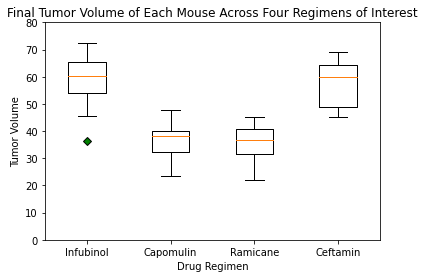

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')
ax7.set_ylabel('Tumor Volume')
ax7.set_xlabel('Drug Regimen')
data = [tumors_Infubinol, tumors_Capomulin, tumors_Ramicane, tumors_Ceftamin]
plt.ylim(0, 80)
green_diamond = dict(markerfacecolor='g', marker='D')
ax7.boxplot(data, flierprops=green_diamond, labels=['Infubinol', 'Capomulin', 'Ramicane', 'Ceftamin',])

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse s185 Tumor Volume vs. Time Point with Capomulin')

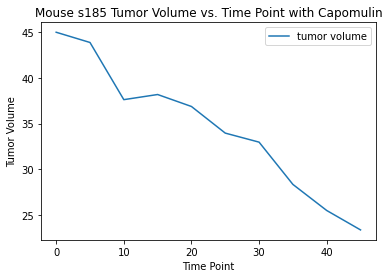

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Get data for all mice treated with Capomulin

test_df = clean_merged_df[clean_merged_df["Drug Regimen"].isin(["Capomulin"])]
test_df


#select one mouse treated with Capomulin - mouse ID - s185

one_mouse_df = test_df.loc[test_df["Mouse ID"] == "s185"]
one_mouse_df

# Generate a line plot of tumor volume vs. time point for *a mouse* treated with Capomulin. Note only one mouse!!!!

lineplt_df = pd.DataFrame({
   'tumor volume': [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
      }, index = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
lines = lineplt_df.plot.line()

plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.title("Mouse s185 Tumor Volume vs. Time Point with Capomulin")

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#Get only necessary data from table 

scatter_df = test_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatter_df



,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [28]:
avg_tumor_vol = scatter_df.groupby(scatter_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_vol

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#Looking at each mouses' weight

unique_mouse_weight = scatter_df.groupby(scatter_df["Mouse ID"])["Weight (g)"].nunique()
unique_mouse_weight

Mouse ID
b128    1
b742    1
f966    1
g288    1
g316    1
i557    1
i738    1
j119    1
j246    1
l509    1
l897    1
m601    1
m957    1
r157    1
r554    1
r944    1
s185    1
s710    1
t565    1
u364    1
v923    1
w150    1
w914    1
x401    1
y793    1
Name: Weight (g), dtype: int64

In [30]:
each_mouse_weight = scatter_df.groupby(scatter_df["Mouse ID"])["Weight (g)"].mean()
each_mouse_weight

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

NameError: name 'model' is not defined

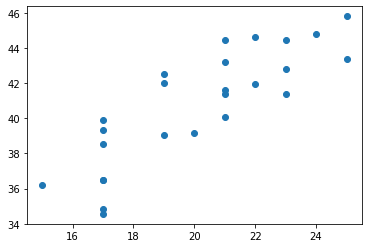

In [31]:
#Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

y_values = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829]
x_values = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
plt.scatter(x_values, y_values)
y_values = each_mouse_weight*model[0]+model[1]
plt.xlabel('mouse weight (g)')
plt.ylabel('average tumor volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ')
plt.show()

## Correlation Co-efficient and Linear Regression Model

In [32]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(each_mouse_weight,avg_tumor_vol)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84


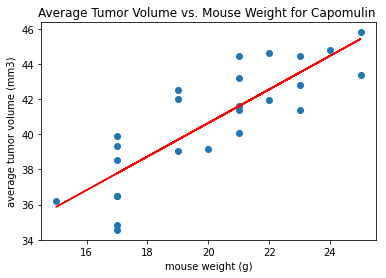

In [33]:
#perform a linear regression model on average tumor volume vs. mouse weight for the Capomulin regimen
y_values = [41.963636, 40.083699, 36.505973, 41.990097, 44.613344, 44.805810, 39.141053, 44.465236, 43.216925, 44.434474, 42.507261, 34.847470, 39.049816, 45.798970, 36.509212, 43.367364, 34.559143, 42.803733, 39.328725, 39.887495, 41.581595, 41.384825, 41.352452, 36.182040, 38.506829]
x_values = [22, 21, 17, 19, 22, 24, 20, 23, 21, 21, 19, 17, 19, 25, 17, 25, 17, 23, 17, 17, 21, 23, 21, 15, 17]
plt.scatter(x_values, y_values)
model = st.linregress(each_mouse_weight,avg_tumor_vol)
y_values = each_mouse_weight*model[0]+model[1]
plt.plot(each_mouse_weight, y_values, color ='r')
plt.xlabel('mouse weight (g)')
plt.ylabel('average tumor volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin ')
plt.show()